## Interpreting the Data for Classifications

In [1]:
#importing packages
import time
import pandas as pd
import numpy as np
import itertools
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, AveragePooling2D,GlobalAveragePooling2D, Input, Flatten, Dense, Dropout, ReLU, BatchNormalization, concatenate
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
asteroid = pd.read_csv("Asteroid.csv")
not_asteroid = pd.read_csv("Not_Asteroids.csv")
combined = asteroid.append(not_asteroid)
combined

,Labels,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,...,Pixel_431,Pixel_432,Pixel_433,Pixel_434,Pixel_435,Pixel_436,Pixel_437,Pixel_438,Pixel_439,Pixel_440
0,1,-0.673630,-0.720966,-1.891294,0.784610,0.721648,-1.347891,6.766144,0.609727,-0.370200,...,7.534451,1.924878,-2.024211,6.300043,-1.066589,-4.683404,9.108532,-3.429460,0.378558,5.303571
1,1,-0.593831,-0.695632,-2.901120,2.085182,7.862309,0.007047,-0.006659,-13.028278,3.272303,...,4.015120,1.156173,2.506344,-3.948025,-3.694151,-8.628756,-2.082992,6.041645,-0.954505,0.290206
2,1,-0.265255,-3.223406,5.937766,2.555275,-3.249937,6.636856,1.563640,3.408730,6.022551,...,2.505380,-3.412122,4.096422,4.642891,-0.347161,7.424361,-7.075443,2.914388,-1.371907,-0.966498
3,1,-2.215957,5.845136,5.194939,0.868573,9.659462,-1.871228,3.467164,5.179554,-0.280002,...,2.332005,0.403990,1.667107,-2.005153,-7.555858,4.268818,9.098656,6.001105,0.825255,0.269119
4,1,-6.837533,-1.964763,-3.850596,0.916781,7.573548,2.952277,5.194633,2.644985,-3.337385,...,2.397740,12.478594,8.301515,-9.815702,-5.090724,-0.930586,-0.121054,9.961233,-9.682981,1.972060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,0,-5.965292,-2.558515,5.646257,8.255449,-3.557744,1.599771,9.461289,3.500482,-0.292406,...,3.510937,2.917438,1.984738,0.601024,-5.490007,-7.445587,-12.380378,1.097232,10.275751,0.156686
16796,0,-1.457319,6.952888,3.282207,6.657122,8.358164,-0.728835,-2.925225,-1.142833,-6.495289,...,0.825331,0.440748,3.754517,9.266273,2.356254,7.169093,-2.454257,-10.585925,-3.538686,6.912865
16797,0,-8.408052,-2.529270,3.159942,4.257779,7.099737,-5.607488,-0.442502,11.968606,10.973742,...,10.387383,-1.134581,-6.796037,-12.385778,-9.680419,13.311044,-2.183977,-4.497785,-1.159838,11.709595
16798,0,0.165997,2.018248,4.792155,-2.139938,-8.824825,10.277003,-0.803630,0.489218,3.899904,...,-0.163140,-12.792198,-6.367175,3.000204,0.541270,-3.264209,-3.949053,2.866097,-3.900143,4.406389


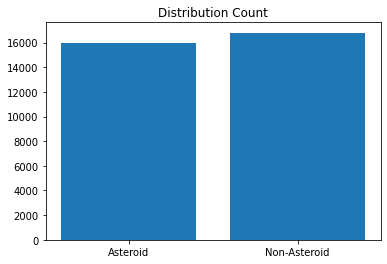

In [3]:
asteroid_count = 0
non_asteroid_count = 0
for i in range(len(combined)):
    if combined.iloc[i,0] == 0:
        non_asteroid_count+=1
    elif combined.iloc[i,0] == 1:
        asteroid_count +=1
        
y_pos = np.arange(2) #2 classes
plt.bar(y_pos, [asteroid_count, non_asteroid_count])
plt.xticks(y_pos, ["Asteroid", "Non-Asteroid"])
plt.title("Distribution Count")
plt.show()

In [4]:
combined = combined.sample(frac=1).reset_index(drop=True)

In [5]:
combined_images = np.array(combined.iloc[:,1:])
combined_labels = combined['Labels']

In [6]:
print(combined_labels.shape)

(32800,)


In [7]:
def min_max_normalization(image_array):
    max_pixel= np.repeat(image_array.max(axis=0), len(image_array)) 
    min_pixel= np.repeat(image_array.min(axis=0), len(image_array))
    normalized_image = (image_array - min_pixel)/ (max_pixel - min_pixel)
    return normalized_image

for i in range(len(combined_images)):
    combined_images[i] = min_max_normalization(combined_images[i]) 
    

In [8]:
train_images, test_images, train_labels, test_labels = train_test_split(combined_images, combined_labels, test_size=0.3, shuffle = False)
train_labels = utils.to_categorical(train_labels-1, 2)
test_labels = utils.to_categorical(test_labels-1, 2)
n1 = len(train_labels)
n2 = len(test_labels)
train_images = train_images.reshape(n1,21,21,1)
test_images= test_images.reshape(n2,21,21,1)

In [9]:
def DenseNet121(train_images, test_images, train_labels, test_labels, n_classes=2, filters=32):
    def conv_block(x, filters, kernel=1, strides=1):
        x = BatchNormalization()(x)
        x=ReLU()(x)
        x = Conv2D(filters, kernel, strides=strides, padding='same')(x)
        return x

    def dense_block(x, rep):
        for _ in range(rep):
            y = conv_block(x, 4*filters)
            y = conv_block(y, filters,3)
            x = concatenate([y,x])
        return x

    def transition_layer(x):
        x = conv_block(x, K.int_shape(x)[-1] //2)
        x = AveragePooling2D(2, strides=2, padding='same')(x)
        return x

    begin = time.time()
    input_shape = Input(shape=(21,21,1))
    x = Conv2D(64, 7, strides = 2, padding = 'same')(input_shape)
    x = MaxPool2D(3, strides = 2, padding = 'same')(x)
    
    for rep in [6,12,24,16]:
        d = dense_block(x, rep)
        x = transition_layer(d)
        
    x = GlobalAveragePooling2D()(d)
    output = Dense(n_classes, activation = 'softmax')(x)
    model = Model(input_shape, output)
    
    with open('modelsummary.txt', 'w') as f:
        model.summary(print_fn=lambda x: f.write(x + '\n'))
    
    sgd = SGD(learning_rate=10e-4, momentum=0.6, decay=0.1, nesterov=False)
    model.compile(loss='binary_crossentropy', optimizer= sgd, metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=20, batch_size=256)
    test_history = model.predict(test_images, batch_size=512)
    end = time.time()
    
    print('Total Time: {} seconds'.format(int(end-begin)))
    
    return history, test_history

In [10]:
history, test_history = DenseNet121(train_images, test_images, train_labels, test_labels)

Train on 22960 samples
Epoch 1/20
22960/22960 [==============================] - 58s 3ms/sample - loss: 0.6499 - accuracy: 0.5974
Epoch 2/20
22960/22960 [==============================] - 63s 3ms/sample - loss: 0.6248 - accuracy: 0.6173
Epoch 3/20
22960/22960 [==============================] - 78s 3ms/sample - loss: 0.6186 - accuracy: 0.6216
Epoch 4/20
22960/22960 [==============================] - 78s 3ms/sample - loss: 0.6163 - accuracy: 0.6233
Epoch 5/20
22960/22960 [==============================] - 79s 3ms/sample - loss: 0.6144 - accuracy: 0.6277
Epoch 6/20
22960/22960 [==============================] - 77s 3ms/sample - loss: 0.6123 - accuracy: 0.6289
Epoch 7/20
22960/22960 [==============================] - 71s 3ms/sample - loss: 0.6126 - accuracy: 0.6271
Epoch 8/20
22960/22960 [==============================] - 78s 3ms/sample - loss: 0.6115 - accuracy: 0.6269
Epoch 9/20
22960/22960 [==============================] - 61s 3ms/sample - loss: 0.6104 - accuracy: 0.6334
Epoch 10/20
22

In [13]:
def plot_confusion_matrix(cm,target_names, title='Confusion matrix',cmap=None, normalize=False):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    recall = cm[0][0] / float(cm[0][0]+cm[0][1])
    precision = cm[0][0] / float(cm[0][0]+cm[1][0])


    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\nAccuracy={:0.4f}; Error={:0.4f}; Precision={:0.4f},Recall={:0.4f},  '.format(accuracy, misclass, precision, recall))
    plt.show()
    
def pred_actual(predicted_labels, true_labels, name):
    predictions = []
    for i in range(len(predicted_labels)):
        max_value = max(predicted_labels[i])
        if predicted_labels[i,0] == max_value:
            predictions.append(0)
        elif predicted_labels[i,1] == max_value:
            predictions.append(1)
        
    actual = []
    for i in range(len(true_labels)):
        if true_labels[i,0] == 1:
            actual.append(0)
        elif true_labels[i,1] == 1:
            actual.append(1)
    
    cm(actual, predictions, name)

def cm(actual, predictions, name):
    conf_mat = confusion_matrix(actual, predictions)
    plot = plot_confusion_matrix(conf_mat, target_names=["Asteroid", "Non-Asteroid"], title=name)

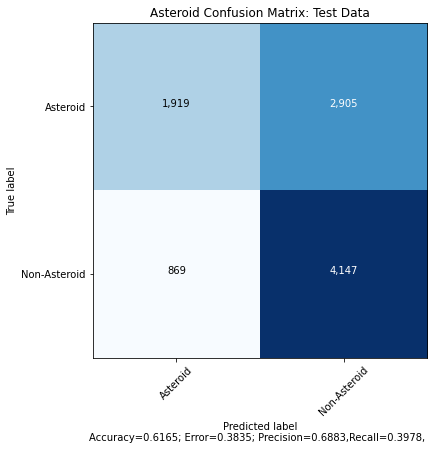

In [14]:
plot_g = pred_actual(test_history, test_labels, name= "Asteroid Confusion Matrix: Test Data")